# Visualize on-sight insights


In [1]:
%pylab inline
import seaborn as sns
sns.set_context("notebook")
import pandas as pd
df = pd.read_pickle("data/lbc_pandas.pkl")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df['size_sqm']=5*(df['sqm_bin']-1)

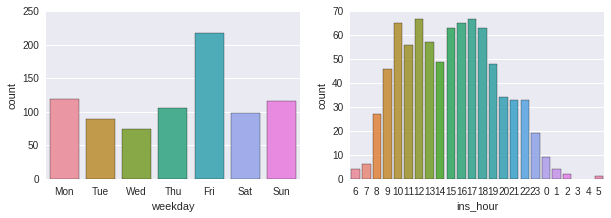

In [3]:
fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
sns.countplot(x='weekday',data=df,ax=ax)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sns.countplot(x='ins_hour',data=df,ax=bx,order=np.roll(range(0,24),-6))

Max surface: 69.0
Min surface: 25.0
Min price: 543.0


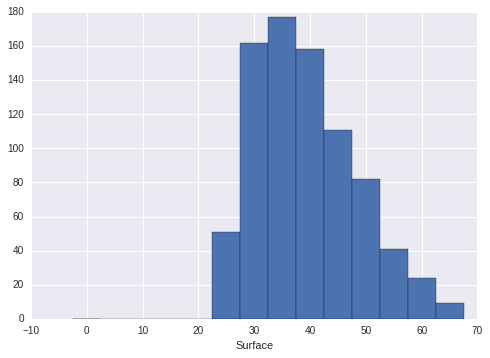

In [4]:
print 'Max surface:',df.Surface.max()
print 'Min surface:',df.Surface.min()
print 'Min price:',df.LoyerMensuel.min()
sns.plt.hist(df.Surface.tolist(),bins=np.arange(0-2.5,int(df.Surface.max())+2.5,5))
sns.plt.xlabel('Surface');

In [5]:
########################################################################
# sorting by average price per arrondissement 
def mean_outliers(x):
    _m = x.mean()
    _v = x.std()
    return x[(x>_m-_v) & (x<_m+_v)].mean()

sorted_district_by_aveprice = []
__tmp = []
for c in df.groupby('Arrondissement'):
#     __tmp.append((c[0],c[1].price_sqm.mean()))
    __tmp.append((c[0],mean_outliers(c[1].price_sqm)))

__tmp = np.asarray(__tmp)
__sidx = np.argsort(__tmp[:,1])
sorted_district_by_aveprice = __tmp[__sidx][:,0]
sorted_district_by_aveprice_labels = ['%d'%j for j in sorted_district_by_aveprice]
sorted_ges_labels = sorted(list(df['Ges_lit'].unique()))

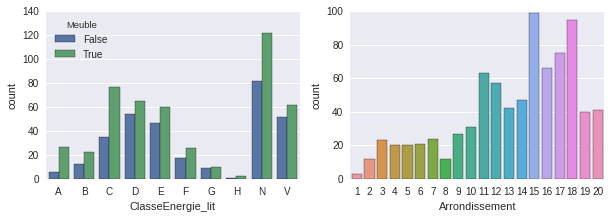

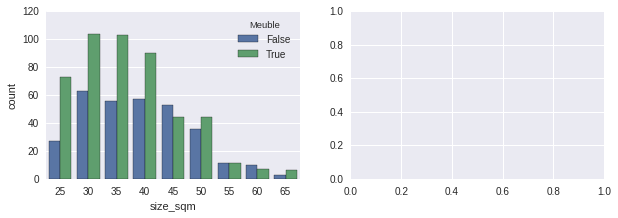

In [6]:
fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
sns.countplot(x='ClasseEnergie_lit',data=df,order=sorted_ges_labels,hue='Meuble',ax=ax)
sns.countplot(x='Arrondissement',data=df,ax=bx)
fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
sns.countplot(x='size_sqm',data=df,hue='Meuble',ax=ax)

##########################################################################################
* color code by sqm_bin too should give the trend of the 1st plot
* # of records 818
                  /20 40.9
                  /15 54.5333333333
##########################################################################################


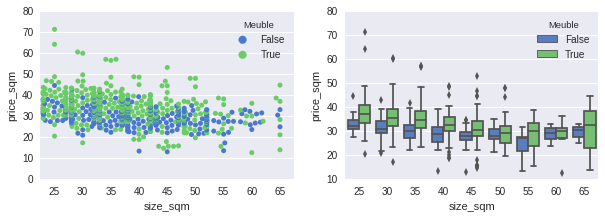

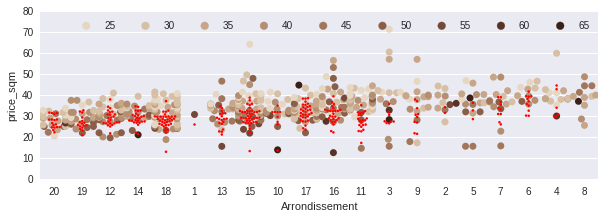

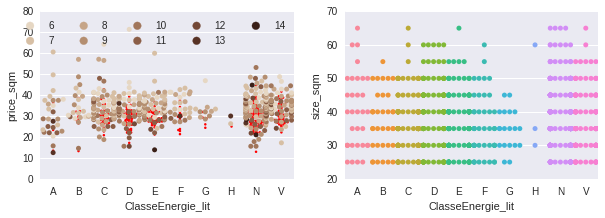

In [7]:
sqm_bin_palette=sns.cubehelix_palette(9, start=1, rot=.1)
# sns.palplot(sqm_bin_palette)
sns.set_palette('muted')
fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
sns.swarmplot(x='size_sqm',y='price_sqm',data=df,ax=ax,palette='muted',hue='Meuble')
sns.boxplot(x='size_sqm',y='price_sqm',data=df,hue='Meuble',ax=bx);
# #####################################################################
fig,ax=sns.plt.subplots(1,1,figsize=(10,3))
sns.swarmplot(y=u'price_sqm',x=u'Arrondissement',data=df[df['Meuble']==True],order=sorted_district_by_aveprice,\
              ax=ax,size=7,palette=sqm_bin_palette,hue='size_sqm')
sns.swarmplot(y=u'price_sqm',x=u'Arrondissement',data=df[df['Meuble']==False],order=sorted_district_by_aveprice,ax=ax,\
              size=2.5,color='#ff0000')
ax.legend(ncol=12)
_=ax.xaxis.set_ticklabels(sorted_district_by_aveprice_labels)

#####################################################################
fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
sns.swarmplot(y=u'size_sqm',x=u'ClasseEnergie_lit',data=df,order=sorted_ges_labels,ax=bx)

sns.swarmplot(y=u'price_sqm',x=u'ClasseEnergie_lit',data=df[df['Meuble']==False],order=sorted_ges_labels,ax=ax,\
              size=2.5,color='#ff0000')
sns.swarmplot(y=u'price_sqm',x=u'ClasseEnergie_lit',data=df[df['Meuble']==True],order=sorted_ges_labels,ax=ax,\
             palette=sqm_bin_palette,hue='sqm_bin');
ax.legend(ncol=5)
#####################################################################
line="#"*90
print line
print '* color code by sqm_bin too should give the trend of the 1st plot'
print '* # of records',df.shape[0]
print '                  /20',df.shape[0]/20.
print '                  /15',df.shape[0]/15.
print line

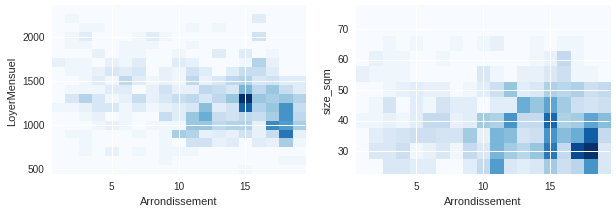

In [8]:
range = sns.plt.np.arange
fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
ax.hist2d(df['Arrondissement'],df['LoyerMensuel'],cmap='Blues',bins=[range(1,21)-.5,range(500,2500,100)-50]);
bx.hist2d(df['Arrondissement'],df['size_sqm'],cmap='Blues',bins=[range(1,21)-.5,sns.plt.np.arange(5*5,17*5,5)-2.5]);
ax.set_xlabel('Arrondissement')
ax.set_ylabel('LoyerMensuel')
bx.set_xlabel('Arrondissement')
bx.set_ylabel('size_sqm')

# Average price for 2 ppl
Since the `price` of a flat must be smaller than 1/3 of what ppl gain (in couple),
we get also the distribution of salaries expected for ppl living in paris:
$ price < (salary_1 + salary_2)/3 $
assuming that $salary_1=salary_2$ (bcs of high education jobs), we get $salary_1 > 3/2 price$

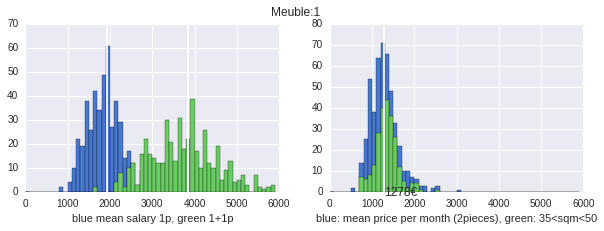

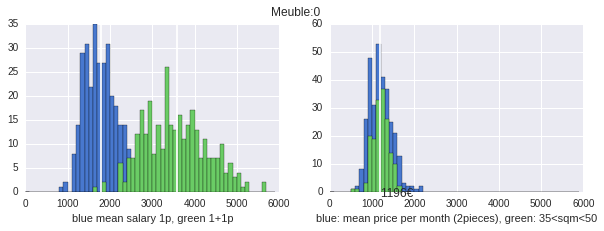

In [9]:
def plot_salaries(df,Meuble=0):
    fig,(ax,bx)=sns.plt.subplots(1,2,figsize=(10,3))
    ifs =  (df.Meuble==Meuble)
    salary1 = df[ifs].LoyerMensuel.values*3/2.
    bins = range(0,6000,100)
    ax.hist(salary1,bins=bins);
    ax.axvline(salary1.mean(),color='w')
    ax.hist(salary1*2,bins=bins);
    ax.axvline(salary1.mean()*2,color='w')
    ax.set_xlabel('blue mean salary 1p, green 1+1p')

    mean_price_per_month = df[ifs].LoyerMensuel.values.mean()
    price_per_month = df[ifs].LoyerMensuel.values


    min_surf = 7
    max_surf = 10+1
    ifs=ifs & (df['sqm_bin']<max_surf) & (df['sqm_bin']>min_surf) 

    price_per_month_select = df[ifs].LoyerMensuel.values
    bx.hist(price_per_month,bins=bins);
    bx.hist(price_per_month_select,bins=bins);
    bx.axvline(mean_price_per_month,color='w')
    bx.set_xlabel('blue: mean price per month (2pieces), green: 35<sqm<50' )
    bx.text(mean_price_per_month,-2,u'{0:.0f}€'.format(mean_price_per_month),)
    fig.suptitle('Meuble:{0:d}'.format(Meuble))

plot_salaries(df,1)
plot_salaries(df,0)

In [10]:
from IPython.display import HTML
import urllib2

style=open('style.css','r').read()
HTML("""
<style>{0}</style>
""".format(style))